In [1]:
# Examples:
# https://www.restack.io/p/image-recognition-answer-python-recognize-numbers-in-image-cat-ai

In [2]:
from PIL import Image
import cv2
import numpy as np

import pytesseract as pt
pt.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

np_next = None

def go_next(np_arr):
    global np_next
    np_next = np_arr
    print(np_next.shape)
    display(Image.fromarray(np_next))

(60, 120, 3)


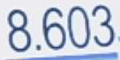

In [3]:
# Crop to digits
img = Image.open('../data/power_meter_digits.png')

# A larger crop as if human have pointed at the power meter
# but Tesseract fails to recognoze ther (probaly some more confoguration/preprocessing required)
#img = Image.open('../data/power_meter.png')

np_src = np.array(img)
go_next(np_src)

(60, 120, 3)


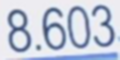

In [4]:
# Apply Gaussian blur
# Images often contain noise that can interfere with OCR accuracy. Applying filters such as Gaussian blur can help reduce this noise
np_blurred = cv2.GaussianBlur(np_next, (5, 5), 0)
go_next(np_blurred)

(600, 1200, 3)


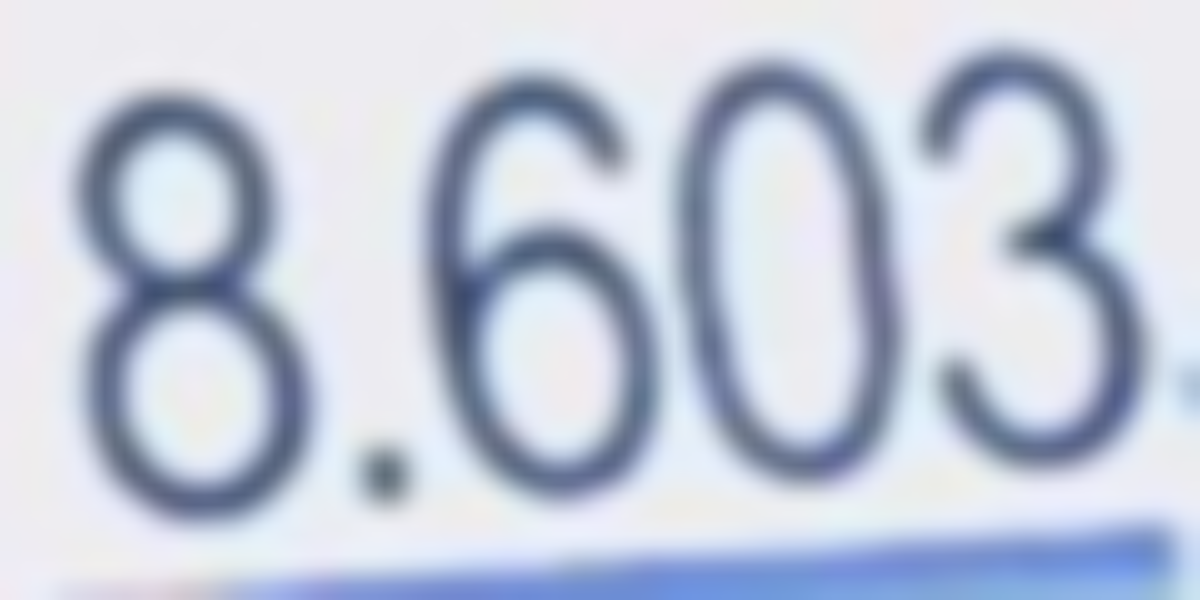

In [5]:
# Said here https://tesseract-ocr.github.io/tessdoc/ImproveQuality.html:
# | Tesseract works best on images which have a DPI of at least 300 dpi, so it may be beneficial to resize images
np_resized = cv2.resize(np_next, None, fx=10, fy=10)
go_next(np_resized)

(600, 1200)


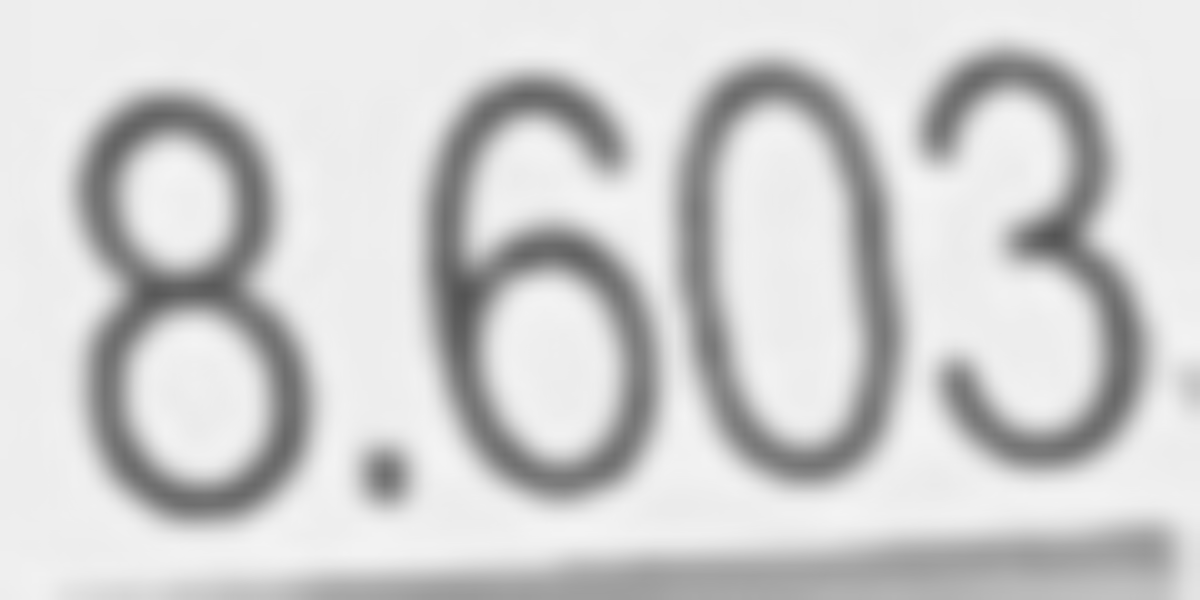

In [6]:
# Convert to grayscale
# Converting images to grayscale simplifies the data and reduces the complexity of the image. 
# This step is essential as it eliminates color distractions and focuses on the intensity of the pixels, which is more relevant for OCR.
np_gray = cv2.cvtColor(np_next, cv2.COLOR_BGR2GRAY)
go_next(np_gray)

(600, 1200)


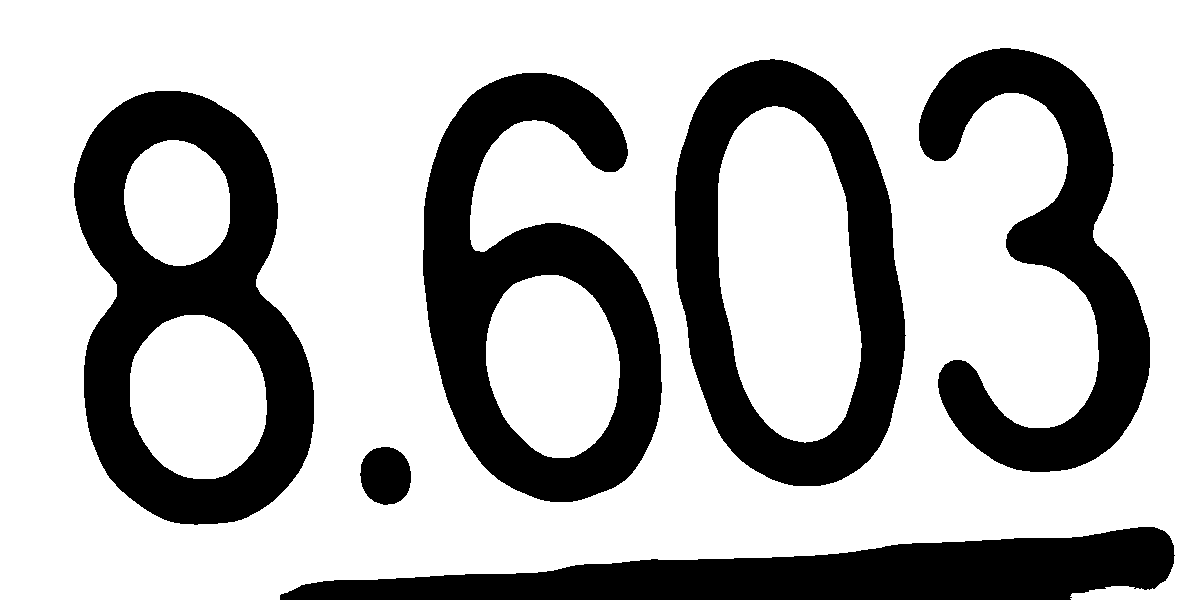

In [7]:
# Apply Otsu's thresholding
# Binarization transforms the image into a binary format, which can enhance the contrast between the text and the background. 
# Techniques like Otsu's thresholding can be particularly effective
# Said here https://tesseract-ocr.github.io/tessdoc/ImproveQuality.html:
# | Tesseract does this internally (Otsu algorithm), but the result can be suboptimal, particularly if the page background is of uneven darkness
_, np_binary = cv2.threshold(np_next, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
go_next(np_binary)

(600, 1200)


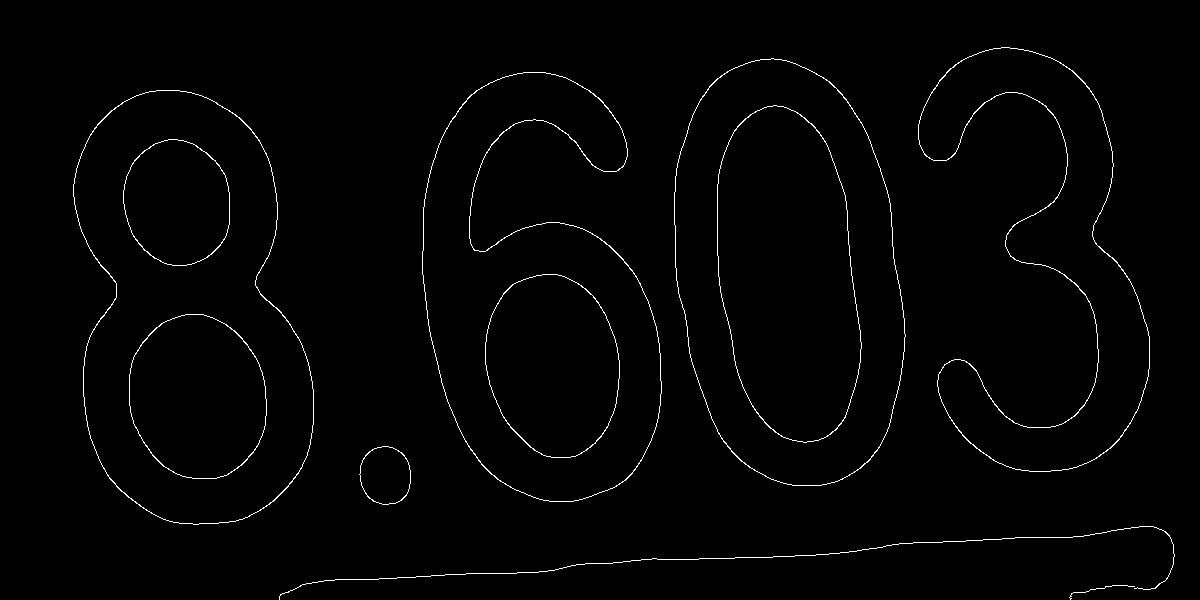

In [8]:
# Apply Canny edge detection
# Using edge detection techniques like Canny can help in highlighting the text areas, making it easier for OCR systems to identify characters
np_edged = cv2.Canny(np_next, 100, 200)
go_next(np_edged)

In [14]:
# Said here https://tesseract-ocr.github.io/tessdoc/ImproveQuality.html
# Tesseract does various image processing operations internally (using the Leptonica library) before doing the actual OCR. 
# It generally does a very good job of this
#
# so seems all these OpenCV preprocessing are unnecessary, they even spoil the result
#np_prc = np_edged
np_prc = np_binary
pt_cfg = '--oem 3 --psm 6'

txt_src = pt.image_to_string(np_src, config=pt_cfg)
txt_prc = pt.image_to_string(np_prc, config=pt_cfg)
print(f'ORIGINAL:\n{txt_src.strip()}')
print('----')
print(f'PROCESSED:\n{txt_prc.strip()}')

ORIGINAL:
8.603
----
PROCESSED:
8.603
